# JAGS example 1 (listing 8.2/8.3)
I'm going to run through the first JAGS example.
The prereq for running this is to have created a mymodel.j file

model {
	#model the data
	for (i in 1:N) {
		xx[i] ~ dnorm(mu,tau)
	}
	#Priors for parameters
	mu ~ dunif(-100,100)
	tau = pow(sigma,-2)
	sigma ~ dunif(0, 100)
}

- the variable xx is presumed to be normally distributed with mean 'mu' and precision 'tau'
- Precision is the reciprocal of the variance : $\tau = 1/\sigma ^2 = \sigma ^{-2} $

- The JAGS for loop is never run.
    - The loop specifies the distributional assumptions held within
    
- $\mu$ and $\tau$ distributions are defined as uniform within the ranges specified

In [2]:
require(rjags)

Loading required package: rjags
Loading required package: coda
Linked to JAGS 4.3.0
Loaded modules: basemod,bugs


In [3]:
setwd("~/Documents/lmb/chapt8")

N=1000
x = rnorm(N,0,2)

myj = jags.model("mymodel.j", data=list("xx" = x, "N" = N))

update(myj,n.iter=1000) #Specify the burnin

#First argument is the model, second is the params to be monitored, third is number of MCMC iterations
mcmcfin=coda.samples(myj,c("mu","tau"),5000)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 1000
   Unobserved stochastic nodes: 2
   Total graph size: 1009

Initializing model




Iterations = 2001:7000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 5000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

        Mean      SD  Naive SE Time-series SE
mu  -0.04607 0.06555 0.0009270       0.001160
tau  0.23931 0.01046 0.0001479       0.000181

2. Quantiles for each variable:

       2.5%      25%      50%       75%   97.5%
mu  -0.1754 -0.09054 -0.04572 -0.001842 0.08111
tau  0.2199  0.23204  0.23923  0.246205 0.26016


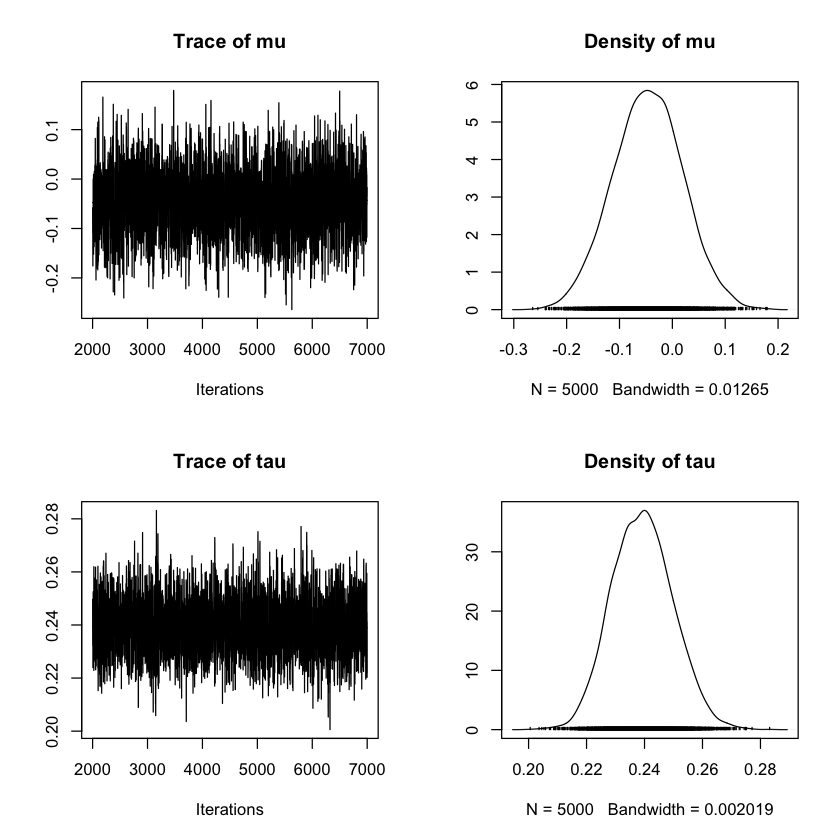

In [4]:
summary(mcmcfin)
plot(mcmcfin)

#So we have largely recovered the mean (mu hovering around 0) and std (tau is inverse square of std dev (2 -> .25))